<a href="https://colab.research.google.com/github/Vrajmotiwala/AI-ML-sillycone/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello world")

hello world


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vrajmotiwala","key":"116c25ddca0f6b0045b05c8a63a2d4fe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d tanishksharma9905/pokemon-data-csv


Dataset URL: https://www.kaggle.com/datasets/tanishksharma9905/pokemon-data-csv
License(s): CC0-1.0
  0% 0.00/53.1k [00:00<?, ?B/s]
100% 53.1k/53.1k [00:00<00:00, 240MB/s]


In [ ]:
# Step 5: Unzip the dataset
import zipfile

with zipfile.ZipFile("pokemon-data-csv.zip", 'r') as zip_ref:
    zip_ref.extractall("pokemon_data")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

os.listdir("pokemon_data")


['pokemon_data.csv']

In [ ]:
data = pd.read_csv("pokemon_data/pokemon_data.csv")
data.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."


In [ ]:
data.describe()

,id,base_experience,height,weight
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,2560.927803,161.943932,20.467742,980.863287
std,3949.887748,82.532554,54.180316,1972.645170
min,1.000000,36.000000,1.000000,0.000000
25%,326.250000,71.000000,5.000000,89.250000
50%,651.500000,165.000000,10.000000,315.500000
75%,976.750000,222.500000,16.000000,818.000000
max,10277.000000,608.000000,1000.000000,10000.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1302 non-null   int64 
 1   name             1302 non-null   object
 2   base_experience  1302 non-null   int64 
 3   height           1302 non-null   int64 
 4   weight           1302 non-null   int64 
 5   types            1302 non-null   object
 6   abilities        1302 non-null   object
 7   moves            1268 non-null   object
 8   stats            1302 non-null   object
dtypes: int64(4), object(5)
memory usage: 91.7+ KB


In [ ]:
data.isnull()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1297,False,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
id,0
name,0
base_experience,0
height,0
weight,0
types,0
abilities,0
moves,34
stats,0


In [ ]:
print(data.columns)

Index(['id', 'name', 'base_experience', 'height', 'weight', 'types',
       'abilities', 'moves', 'stats'],
      dtype='object')


#How many pokemon belongs to each type.

In [ ]:
data['types'].value_counts()

,count
types,
normal,86
water,84
electric,52
grass,49
psychic,47
...,...
"psychic, ice",1
"ice, rock",1
"fighting, fire",1


In [ ]:
import seaborn as sns

/tmp/ipython-input-18-3436098577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_types.index, y=top_10_types.values, palette="viridis")


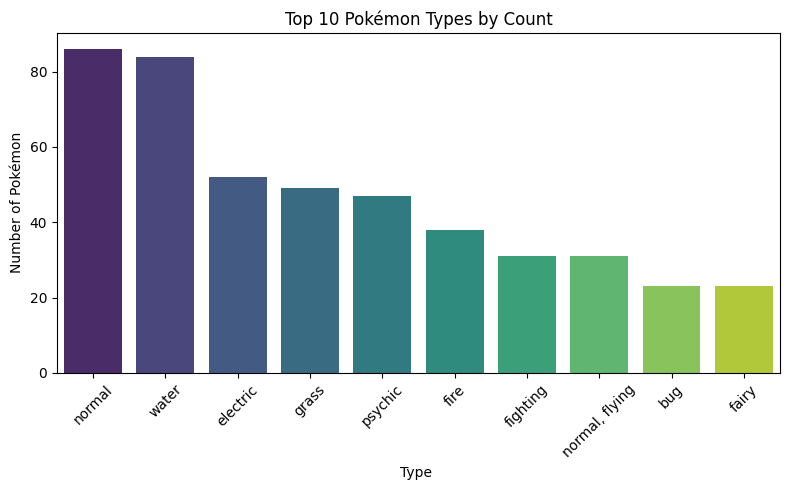

In [ ]:
top_10_types = data['types'].value_counts().head(10)


plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_types.index, y=top_10_types.values, palette="viridis")
plt.title("Top 10 Pokémon Types by Count")
plt.xlabel("Type ")
plt.ylabel("Number of Pokémon")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.loc[0,'stats']

'hp=45, attack=49, defense=49, special-attack=65, special-defense=65, speed=45'

In [ ]:
import ast

In [ ]:

stats_split = data['stats'].str.split(',', expand=True)

stats_split.columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


for col in stats_split.columns:
    stats_split[col] = stats_split[col].str.split('=').str[1].astype(int)
data_1 = pd.concat([data, stats_split], axis=1)



In [ ]:
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
print(data_1[stats].head())

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  39      52       43       60       50     65
4  58      64       58       80       65     80


In [ ]:
data_1

,id,name,base_experience,height,weight,types,abilities,moves,stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6...",45,49,49,65,65,45
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8...",60,62,63,80,80,60
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1...",80,82,83,100,100,80
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6...",39,52,43,60,50,65
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8...",58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,10273,ogerpon-wellspring-mask,275,12,398,"grass, water",water-absorb,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=...",80,120,84,60,96,110
1298,10274,ogerpon-hearthflame-mask,275,12,398,"grass, fire",mold-breaker,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=...",80,120,84,60,96,110
1299,10275,ogerpon-cornerstone-mask,275,12,398,"grass, rock",sturdy,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=...",80,120,84,60,96,110
1300,10276,terapagos-terastal,90,3,160,normal,tera-shell,"headbutt, body-slam, take-down, double-edge, roar","hp=95, attack=95, defense=110, special-attack=...",95,95,110,105,110,85


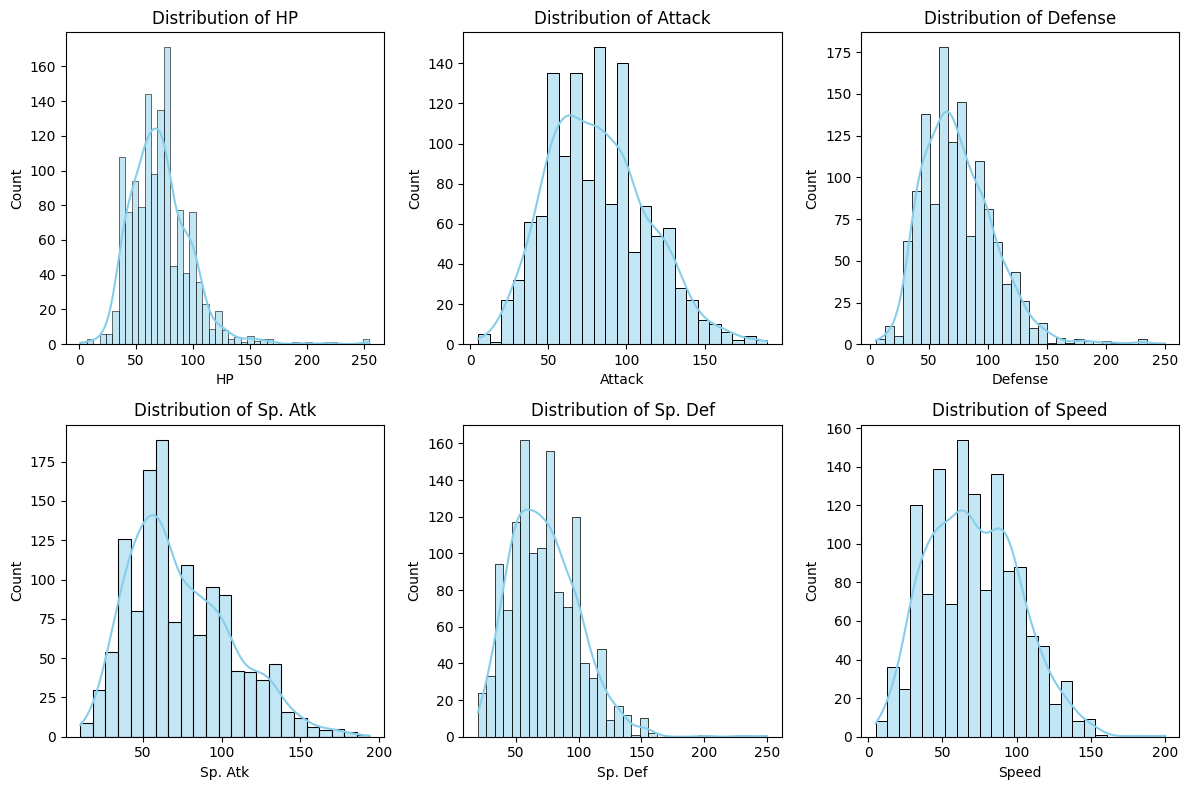

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, stat in enumerate(stats):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_1[stat], kde=True, color='skyblue')
    plt.title(f'Distribution of {stat}')
plt.tight_layout()
plt.show()


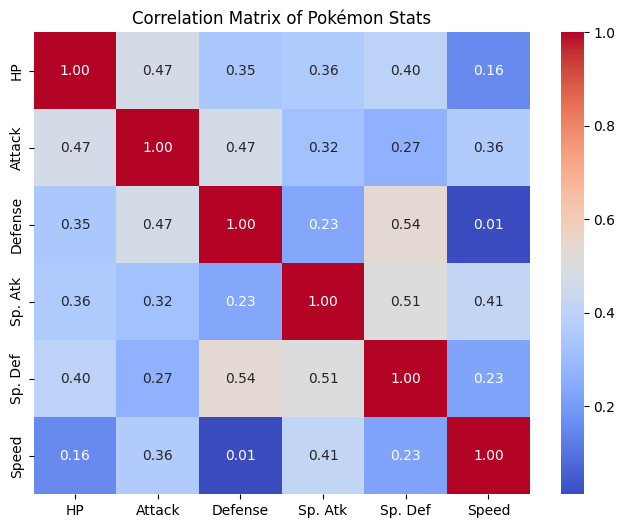

In [ ]:
corr = data_1[stats].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pokémon Stats")
plt.show()

In [ ]:
data_1.describe()

,id,base_experience,height,weight,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2560.927803,161.943932,20.467742,980.863287,71.314900,81.588326,75.241935,73.668203,72.966974,71.156682
std,3949.887748,82.532554,54.180316,1972.645170,26.868926,31.677484,30.492559,32.495546,27.358069,30.310259
min,1.000000,36.000000,1.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,326.250000,71.000000,5.000000,89.250000,54.000000,58.000000,53.000000,50.000000,52.000000,48.000000
50%,651.500000,165.000000,10.000000,315.500000,70.000000,80.000000,70.000000,65.000000,70.000000,70.000000
75%,976.750000,222.500000,16.000000,818.000000,85.000000,100.000000,95.000000,95.000000,90.000000,92.000000
max,10277.000000,608.000000,1000.000000,10000.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [ ]:
# Top 10 fastest Pokémon
data_1[['name', 'types', 'Speed']].sort_values(by='Speed', ascending=False).head(10)

,name,types,Speed
893,regieleki,electric,200
1027,deoxys-speed,psychic,180
290,ninjask,"bug, flying",160
794,pheromosa,"bug, fighting",151
100,electrode,electric,150
1066,aerodactyl-mega,"rock, flying",150
1256,electrode-hisui,"electric, grass",150
1061,alakazam-mega,psychic,150
385,deoxys-normal,psychic,150
1025,deoxys-attack,psychic,150


In [ ]:
# Top 10 Attacking Pokémon
data_1[['name', 'types', 'Attack']].sort_values(by='Attack', ascending=False).head(10)

,name,types,Attack
1067,mewtwo-mega-x,"psychic, fighting",190
1071,heracross-mega,"bug, fighting",185
797,kartana,"grass, steel",181
1025,deoxys-attack,psychic,180
1102,groudon-primal,"ground, fire",180
1103,rayquaza-mega,"dragon, flying",180
1046,kyurem-black,"dragon, ice",170
1082,garchomp-mega,"dragon, ground",170
1181,necrozma-ultra,"psychic, dragon",167
1092,gallade-mega,"psychic, fighting",165


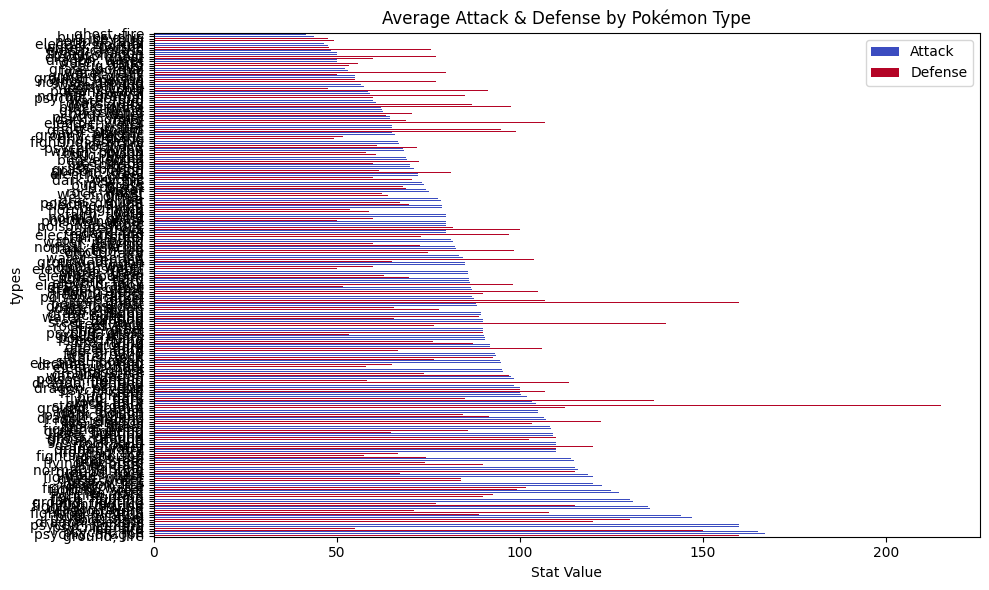

In [ ]:
avg_stats_by_type = data_1.groupby('types')[stats].mean().sort_values(by='Attack', ascending=False)

# Bar plot of average Attack and Defense
avg_stats_by_type[['Attack', 'Defense']].plot(kind='barh', figsize=(10, 6), colormap='coolwarm')
plt.title("Average Attack & Defense by Pokémon Type")
plt.xlabel("Stat Value")
plt.tight_layout()
plt.show()
